# Machine Learning Project

In [1]:
# Student names and numbers:
#Matey Matev 285041
#Mihail Alexandru Teodosiu 299111
#Pawel Skrzypkowski 293167 
#Fatema Ataii 297107

The assignments below should be solved and documented as a project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises.
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to.

Please hand in assignment 1-6 in a _**single**_ Jupyter notebook where you retain the questions outlined below. You are welcome to adapt code from the web (e.g. Kaggle kernels), but you **_must_** reference the original source in your notebook. In addition to _clean, well-documented code_ (i.e. functions with <a href="https://www.geeksforgeeks.org/python-docstrings/">docstrings</a>, etc), your notebook will be judged according to how well each step is explained (using Markdown). 

In general, direct questions regarding assignments 1, 4, 5 and 6 to Frederik, and questions regarding assignments 2, 3, and 7 to Richard. 

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

**Groups:** Create your own groups. May be across teams. 2-4 students per group. No one-person groups.


**Submission deadline:** Thursday, December 15 before 13.00 CET (Notebooks + presentation recording)

**Expected workload:** Each student is expected to spend around around 50 hours on the project.

### Deliverables
The teams have to submit three deliverables before the submission deadline: 1) a notebook of assignments 1-6, 2) a notebook of assignment 7, and 3) presentation video uploaded to some online platform e.g. YouTube, Vimeo, etc.

#### Notebook
The notebook contains all the code to explore the dataset, train the final model and documents each step clearly. If code is copied from another codebase such as Github or Stack Overflow it **_must_** be properly referenced.


#### Presentation
The presentation video should be 15 min long and should highlight the problem you are solving, interesting things you found in the data and the step involved in building up your model. At the exam we will discuss the presentation and ask questions about your project and submissions. A link to the video must be placed in the notebook for assignment 7.

### Randomness
For ALL random states, choose state = 69 so we can replicate your work.


In [1]:
# Import all necessary modules here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.cluster import KMeans
import mglearn 
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.io import loadmat
from sklearn.utils import resample
from sklearn.metrics.cluster import adjusted_rand_score

## 1. The IceCat Dataset
#### Mihail Alexandru Teodosiu 299111
__You should be able to do this exercise after Lecture 3.__

The IceCat Dataset, kindly provided to us by Stibo Systems, contains a large amount of data on different office products. As an example of "real-world" data, these data are imperfect and incomplete. As such, this exercise is not so much an exercise in creating a good machine learning model, but places a larger emphasis on "cleaning the data".

We are going to work with a subset of the IceCat Dataset. In particular, you will be provided with a zip file of 5,854 images of office products, each with the name "product ID".jpg. You will also be provided with a list of colors, `colors.txt`, which, when imported using the code below, is a list of tuples of the form `[("product ID", "color"), ...]`. (The code below assumes that `colors.txt` is in the same folder as the jupyter notebook. Feel free to change the code if you prefer a different organization of your files).

Your task is to clean up the data and construct a simple machine learning model (_e.g._, _k_-nearest neighbor) that can identify the color of a product. You have free hands - there is hardly any one "correct answer" - but you need to argue for your choices. Among other things, you probably need to think about the following as you work with the data:

* All of the images have different sizes.

* Some of the images are RGB images (3 layers), others are CMYK (4 layers), some might even be black-and-white (1 layer).

* Some colors are only represented by very few products.

* Some colors are very similar, such as "Purple" and "Violet".

* A product may have a particular color, but a packaging of a different color. Similarly, the color of, say, a computer monitor may be black, while the image of it could show a monitor that is turned on with a green screensaver.

* Many products are attributed to several colors, such as "Black, Blue" or even "Blue, Green, Orange, Violet, Yellow". Yet others are described as "Multicolor" or "Assorted colors".

Again, you have free hands in how you are going to solve these (and other) challenges, but you must argue for and reflect on your choices as you progress.

In [18]:
from PIL import Image
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report

#### 1) Uniformizing the size of the images

In [19]:
originalPath = 'IceCatDataset/images/'
newPath = 'UniformIceCatDataset/'

os.system('mkdir ' + newPath[:-1])

def resize_aspect_fit():
    dirs = os.listdir(originalPath)
    for item in dirs:
        if item == '.jpg':
            continue
        if os.path.isfile(originalPath+item):
            image = Image.open(originalPath+item)
            file_path, extension = os.path.splitext(newPath+item)

            image = image.resize((100, 100), Image.ANTIALIAS)
            image.save(file_path + extension, 'JPEG', quality=90)


resize_aspect_fit()

#### 2) Lack of training data for some colors

Start by getting the colors from file, then delete the images with colors that appear less than 25 times as there is too little data.

In [20]:
import ast
with open("IceCatDataset/colors.txt","r") as file:
    colors = ast.literal_eval(file.read())

df = []
for image in colors:
    df.append(list(image))
    
df = pd.DataFrame(df, columns = ["Name","Color"])

groups = df.groupby("Color")['Name'].nunique()

x = []
y = []
for (index,data) in enumerate(groups):
    if(data < 25):
        x.append(data)
        y.append(groups.index[index])
        
df = df[~df["Color"].isin(y)]

#### 3) Extremely similar colors

This is solved by grouping the colors together.

In [21]:
print(df.groupby("Color")['Name'].nunique())

Color
Black             1034
Black, Grey         52
Black, Silver       74
Black, White       123
Black, Wood         31
Blue               470
Blue, Grey          26
Blue, Metallic      32
Blue, White         50
Brown               95
Green              217
Green, White        49
Grey               392
Grey, White        105
Multicolour        234
Orange              89
Pink                50
Purple              38
Red                276
Silver             139
Transparent        344
White              694
Wood                71
Yellow             203
Name: Name, dtype: int64


In [22]:
similar = {
    "Brown" : ["Beige","Wood"],
    "Blue": ["turquoise"],
    "Purple" : [ "Violet"],
    "Silver" : ["Aluminium","Metallic","Stainless steel"],
    "Yellow" : ["Gold"]
}


for key in similar:
    for color in similar[key]:
        df.loc[df["Color"].str.lower() == color.lower(), 'Color'] = key.capitalize()

print(df.groupby("Color")['Name'].nunique())

Color
Black             1034
Black, Grey         52
Black, Silver       74
Black, White       123
Black, Wood         31
Blue               470
Blue, Grey          26
Blue, Metallic      32
Blue, White         50
Brown              166
Green              217
Green, White        49
Grey               392
Grey, White        105
Multicolour        234
Orange              89
Pink                50
Purple              38
Red                276
Silver             139
Transparent        344
White              694
Yellow             203
Name: Name, dtype: int64


#### 4) Multicolor, assorted color products

Simply remove them.

In [23]:
# delete the transparent images
df = df[~df["Color"].isin(['Transparent'])]
df = df[~df["Color"].isin(['Multicolor'])]

#delete all multiple colors
df = df[~df["Color"].str.contains(",")]
df = df[~df["Color"].str.contains("Multicolour")]
df = df[~df["Color"].str.contains("Assorted colours")]

print(df.groupby("Color")['Name'].nunique())

Color
Black     1034
Blue       470
Brown      166
Green      217
Grey       392
Orange      89
Pink        50
Purple      38
Red        276
Silver     139
White      694
Yellow     203
Name: Name, dtype: int64


#### 5) the number of layers (1, 3 or 4)

We must flatten the images and collapse them into one dimension. <br>
By collapsing all images to one layer, we make the number of layers uniform, but we unfortunately lose color.

In [24]:
OneDimArray = []

cleanDirectory = 'UniformIceCatDataset/'

folder = [filename for filename in os.listdir(cleanDirectory)]  

for filename in df["Name"]:
    img = np.array(Image.open(cleanDirectory + str(filename) + '.jpg'))
    arr = (img.flatten())
    OneDimArray.append(np.asarray(arr,  dtype=object))
    
OneDimArray = np.asarray(OneDimArray, dtype=object)

In [25]:
newA = []

cleanDirectory = 'UniformIceCatDataset/'

folder = [filename for filename in os.listdir(cleanDirectory)]  

for filename in df["Name"]:
    img = Image.open(cleanDirectory + str(filename) + '.jpg').convert('RGB')
    numpydata = np.asarray(img, dtype=object)
    flat = numpydata.flatten()
    newA.append(flat)
   
newA = np.asarray(newA, dtype=object)

In [26]:
newA

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=object)

#### Model

In [27]:
#Look only at odd numbers
parameters = {'n_neighbors': range(1,20,2)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, refit = True, return_train_score=True, verbose=4)

# Load the data and divide into train and test
X_train, X_test, y_train, y_test = train_test_split(newA, df['Color'], random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=69)
print(parameters)
print(len(X_train),len(X_test))

{'n_neighbors': range(1, 20, 2)}
2119 942


In [28]:
display(X_train, X_test, X_train.ndim, X_test.ndim)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=object)

array([[255, 255, 255, ..., 255, 255, 255],
       [253, 253, 253, ..., 253, 253, 253],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=object)

2

2

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .n_neighbors=1;, score=(train=0.980, test=0.594) total time=   3.5s
[CV 2/5] END .n_neighbors=1;, score=(train=0.979, test=0.649) total time=   2.3s
[CV 3/5] END .n_neighbors=1;, score=(train=0.980, test=0.552) total time=   2.3s
[CV 4/5] END .n_neighbors=1;, score=(train=0.978, test=0.646) total time=   2.5s
[CV 5/5] END .n_neighbors=1;, score=(train=0.980, test=0.598) total time=   2.4s
[CV 1/5] END .n_neighbors=3;, score=(train=0.775, test=0.552) total time=   2.6s
[CV 2/5] END .n_neighbors=3;, score=(train=0.762, test=0.639) total time=   2.4s
[CV 3/5] END .n_neighbors=3;, score=(train=0.767, test=0.566) total time=   2.5s
[CV 4/5] END .n_neighbors=3;, score=(train=0.763, test=0.639) total time=   2.3s
[CV 5/5] END .n_neighbors=3;, score=(train=0.767, test=0.579) total time=   2.4s
[CV 1/5] END .n_neighbors=5;, score=(train=0.709, test=0.517) total time=   2.4s
[CV 2/5] END .n_neighbors=5;, score=(train=0.700

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20, 2)},
             return_train_score=True, verbose=4)

In [31]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)


print("Training Prediction: {}".format(knn.score(X_train,y_train)))

print("Test Prediction: {}".format(knn.score(X_test,y_test)))

Training Prediction: 0.5960358659745163
Test Prediction: 0.5435244161358811


In [32]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

       Black       0.75      0.52      0.61       257
        Blue       0.72      0.60      0.66       116
       Brown       0.39      0.51      0.44        39
       Green       0.31      0.17      0.22        64
        Grey       0.24      0.53      0.33        91
      Orange       0.64      0.35      0.45        26
        Pink       1.00      0.31      0.48        16
      Purple       0.00      0.00      0.00         5
         Red       0.67      0.45      0.54        78
      Silver       1.00      0.04      0.08        24
       White       0.55      0.84      0.67       178
      Yellow       0.79      0.65      0.71        48

    accuracy                           0.54       942
   macro avg       0.59      0.41      0.43       942
weighted avg       0.61      0.54      0.54       942



C:\Users\mmate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Source of information: 
- https://stackoverflow.com/questions/21517879/python-pil-resize-all-images-in-a-folder
- https://stackoverflow.com/questions/59774433/python-load-txt-as-array
- https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearchcv

## 2. Flights Departing from NYC
#### Pawel Skrzypkowski 293167
#### Matey Dimitrov Matev - 285041

__You should be able to do this exercise after Lecture 4.__

For this exercise we will be using the famous nycflights13 data which contains the `airlines`, `airports`, `flights`, `planes`, and `weather` datasets. Please see the documentation (`nycflights13.pdf`) for further information.

**(a)** Load all files as pandas dataframes and display the first 5 rows of each dataset.

In [2]:
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
planes = pd.read_csv('planes.csv')
weather = pd.read_csv('weather.csv')

display("flights")
display(flights[0:5])
display("airlines")
display(airlines[0:5])
display("airports")
display(airports[0:5])
display("planes")
display(planes[0:5])
display("weather")
display(weather[0:5])

'flights'

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


'airlines'

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


'airports'

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5.0,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6.0,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6.0,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5.0,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5.0,A,America/New_York


'planes'

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


'weather'

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


**(b)** Convert all temperature attributes to degree Celsius. We will be using this in what follows.

In [3]:
print("Before conversion")
display(weather[0:5])

weather["temp"] = (weather["temp"] - 32) * 5/9
weather["dewp"] = (weather["dewp"] - 32) * 5/9

print("After conversion")
display(weather[0:5])

Before conversion


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


After conversion


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


**(c)** Using OLS, investigate if flight distance is associated with arrival delay. You should be cautious regarding negative delays.

In [4]:
flightdata = flights.copy(deep=True)
flightdata["arr_delay"] = flightdata["arr_delay"] - flights["dep_delay"] 
flightdata = flightdata.dropna()

X = flightdata.loc[:,["distance"]]
y = flightdata.loc[:,["arr_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=69)

ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS
Train data: 0.009430259039519329 
Test data: 0.00811720102291602


In [9]:
#Not Associated.

**(d)** Using OLS, investigate if departure delay is associated with arrival delay. Again,
   consider what to do with negative delays.

In [5]:
flightdata = flights.copy(deep=True)
flightdata = flightdata.dropna()

X = flightdata.loc[:,["dep_delay"]]
y = flightdata.loc[:,["arr_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=69)

ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS
Train data: 0.7926562035266644 
Test data: 0.7965704895643246


In [ ]:
#Associated

**(e)** Investigate whether departure delay is associated with weather conditions
   at the origin airport. This includes descriptives, plotting, regression modelling,
   considering missing values etc. For regression, do OLS, Ridge, Lasso, and Elastic Net.
   The analysis should also include seasonality trends as a "weather condition". You could,
   for instance, plot the daily departure delay with the date (or monthly). What are the
   three most important weather conditions when trying to predict departure delays?

C:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Weather relation to departure delays
Train data: 0.021183758734537372 
Test data: 0.01802748617090766


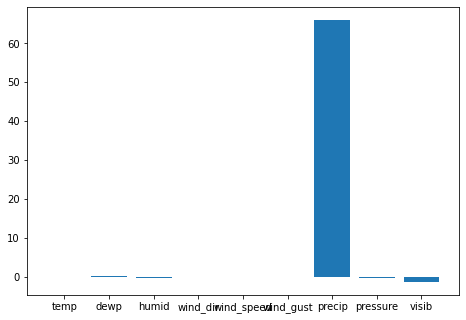

In [6]:
flightdata = pd.merge(flights.copy(deep=True), weather.copy(deep=True), on=["origin", "year", "month", "day", "hour"])

flightdata = flightdata.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib" ,"dep_delay", "arr_delay"]]

flightdata = flightdata.dropna()

X = flightdata.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"]]
y = flightdata.loc[:,["dep_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=69)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print("Weather relation to departure delays\nTrain data: {} \nTest data: {}".format(lassocv.score(X_train, y_train), lassocv.score(X_test,y_test)))

# Show graph of most important parameters
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
col = X.columns
score = lassocv.coef_
ax.bar(col,score)
plt.show()

In [7]:
#Seasonality analysis
#Get amount of delays for each month and total flights for each month
flightdata = pd.merge(flights.copy(deep=True), weather.copy(deep=True), on=["origin", "year", "month", "day", "hour"])
flightdata["dep_delay"] = flightdata["dep_delay"].apply(lambda value: 1 if value > 0 else 0)
flightdata = flightdata.dropna()

monthsNames = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October","November", "December"]
monthsAmountDelayed = []
monthsAmountTotal = []
monthsAmountPercent = []


for x in range(0,12):
  monthsAmountDelayed.append(0)
  monthsAmountTotal.append(0)
  monthsAmountPercent.append(0)

for index, row in flightdata.iterrows():

  if row["dep_delay"] == 1:
    monthsAmountDelayed[row["month"] - 1] = monthsAmountDelayed[row["month"] - 1] + 1

  monthsAmountTotal[row["month"] - 1] = monthsAmountTotal[row["month"] - 1] + 1


for i, data in enumerate(monthsAmountPercent):
  monthsAmountPercent[i] = monthsAmountDelayed[i] /  monthsAmountTotal[i] * 100

Seasonal analysis of flight delays
Blue - total flights
Orange - delayed flights


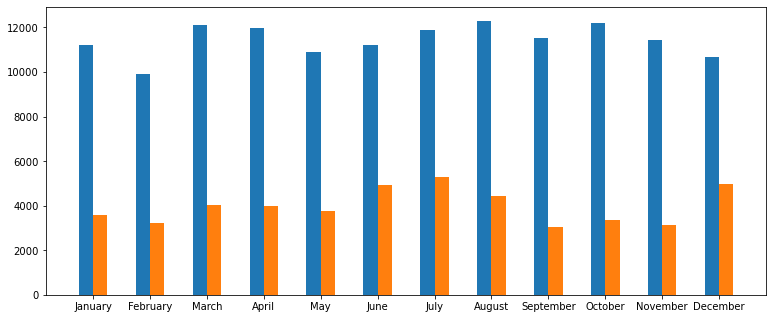

In [8]:
print("Seasonal analysis of flight delays\nBlue - total flights\nOrange - delayed flights")
x = np.arange(len(monthsNames)) 
fig = plt.figure()
fig.set_figwidth(10)
ax = fig.add_axes([0,0,1,1])
col = monthsNames
width = 0.25
ax.bar(x - width/2, monthsAmountTotal, width, label='Total')
ax.bar(x + width/2, monthsAmountDelayed, width, label='Delayed')
ax.set_xticks(x)
ax.set_xticklabels(col)
plt.show()


Seasonal analysis of flight delays
Shown percentage of flights missed from total that month 


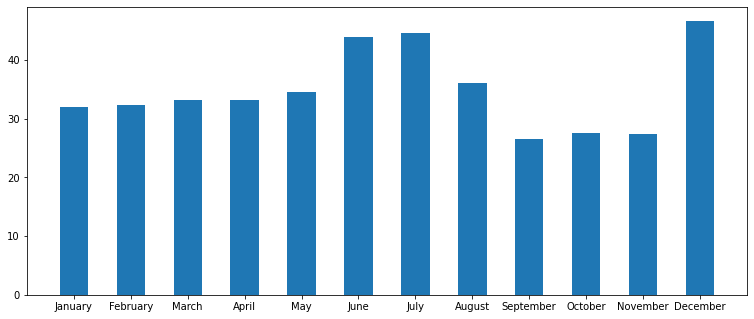

In [9]:
print("Seasonal analysis of flight delays\nShown percentage of flights missed from total that month ")
fig = plt.figure()
fig.set_figwidth(10)
ax = fig.add_axes([0,0,1,1])
col = monthsNames
width = 0.50
ax.bar(x, monthsAmountPercent, width, label='Total')
ax.set_xticks(x)
ax.set_xticklabels(col)
plt.show()


**(f)** Is the age of the plane associated with delay? Do OLS, Ridge, Lasso, and Elastic Net.

In [10]:
flightdata = pd.merge(flights.copy(deep=True), planes.copy(deep=True), on="tailnum")

flightdata = flightdata.loc[:,["year_x", "year_y", "dep_delay", "arr_delay"]]
flightdata["plane_age"] = flightdata["year_x"] - flightdata["year_y"]
flightdata = flightdata.dropna()

X = flightdata.loc[:,["plane_age"]]
y = flightdata.loc[:,["dep_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=69)
ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS dep and plane age\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS dep and plane age
Train data: 0.00048792762085902996 
Test data: 0.0005819375915006031


In [11]:
flightdata = pd.merge(flights.copy(deep=True), planes.copy(deep=True), on="tailnum")

flightdata = flightdata.loc[:,["year_x", "year_y", "dep_delay", "arr_delay"]]
flightdata["plane_age"] = flightdata["year_x"] - flightdata["year_y"]
flightdata["arr_delay"] = flightdata["arr_delay"] - flights["dep_delay"] 
flightdata = flightdata.dropna()

X = flightdata.loc[:,["plane_age"]]
y = flightdata.loc[:,["arr_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=69)
ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS arr and plane age\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS arr and plane age
Train data: 0.00022335819160279602 
Test data: 0.00019479510569231362


In [12]:
flightdata = pd.merge(flights.copy(deep=True), planes.copy(deep=True), on="tailnum")

flightdata = flightdata.loc[:,["year_x", "year_y", "dep_delay", "arr_delay"]]
flightdata["plane_age"] = flightdata["year_x"] - flightdata["year_y"]
flightdata = flightdata.dropna()

X = flightdata.loc[:,["plane_age"]]
y = flightdata.loc[:,["dep_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=69)

In [13]:

alphas = 10**np.linspace(-10, 10, 100)
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)

print("Ridge\nTrain data: {} \nTest data: {}".format(ridgecv.score(X_train, y_train), ridgecv.score(X_test,y_test)))

C:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Ridge
Train data: 0.000487754833905063 
Test data: 0.0005792771605266367


In [14]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print("Lasso\nTrain data: {} \nTest data: {}".format(lassocv.score(X_train, y_train), lassocv.score(X_test,y_test)))

Lasso
Train data: 0.00048792713293144274 
Test data: 0.0005818050743081615


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


**(g)** Do a principal component analysis of the weather at JFK using the following columns:
   temp, dewp, humid, wind_dir, wind_speed, precip, visib.
   How many principal components should be used to capture the variability in the weather data?

In [15]:
weatherdata = weather.copy(deep=True)
weatherdata = weatherdata.loc[weatherdata["origin"] == "JFK"]
weatherdata = weatherdata.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "precip", "visib"]]
weatherdata = weatherdata.dropna()
weatherdata.loc[:,"temp":"visib"] = StandardScaler().fit_transform(weatherdata.loc[:,"temp":"visib"])

pca = PCA(n_components=None)
pca.fit(weatherdata)

transformed_data = pca.transform(weatherdata)

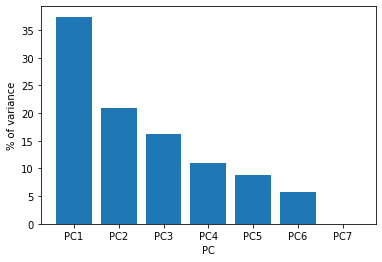

In [16]:

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #labels for the plot

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of variance')
plt.xlabel("PC")

plt.show()

In [ ]:
#PC1-PC6 Should be used to have all vairiance in data.

**(h)** Build regression models (OLS, Ridge, Lasso, and Elastic Net) that associates
   an airports lattitude with weather conditions (temp, dewp, humid, wind_dir, wind_speed,
   precip, visib). Remove all but the three most significant whether conditions and redo
   the analysis.

In [17]:
airportWeather = pd.merge(weather.copy(deep=True), airports.copy(deep=True), left_on='origin', right_on='faa')
airportWeather = airportWeather.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "precip", "visib", "lat"]]
airportWeather = airportWeather.dropna()

X = airportWeather.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "precip", "visib"]]
y = airportWeather.loc[:,["lat"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=69)


In [18]:

ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS
Train data: 0.034492084968310355 
Test data: 0.00814285786287039


In [19]:
alphas = 10**np.linspace(-10, 10, 100)
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)

print("Ridge\nTrain data: {} \nTest data: {}".format(ridgecv.score(X_train, y_train), ridgecv.score(X_test,y_test)))

Ridge
Train data: 0.03449174264611965 
Test data: 0.00815968688183144


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [20]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print("Lasso\nTrain data: {} \nTest data: {}".format(lassocv.score(X_train, y_train), lassocv.score(X_test,y_test)))


Lasso
Train data: 0.034475297665080284 
Test data: 0.00835254135191943


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


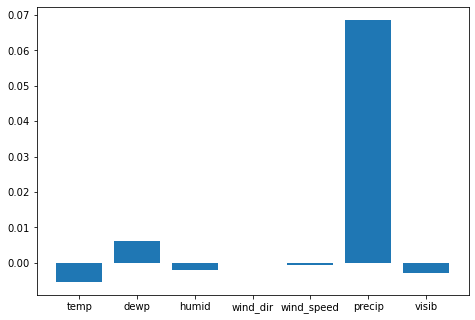

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
col = X.columns
score = lassocv.coef_
ax.bar(col,score)
plt.show()

In [ ]:
#dewp,temp,percip

In [22]:
airportWeather = pd.merge(weather.copy(deep=True), airports.copy(deep=True), left_on='origin', right_on='faa')
airportWeather = airportWeather.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "precip", "visib", "lat"]]
airportWeather = airportWeather.dropna()

X = airportWeather.loc[:,["temp", "dewp", "precip"]]
y = airportWeather.loc[:,["lat"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=69)


In [23]:
ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS
Train data: 0.014707683282433548 
Test data: 0.014889853484747362


In [24]:
alphas = 10**np.linspace(-10, 10, 100)
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)

print("Ridge\nTrain data: {} \nTest data: {}".format(ridgecv.score(X_train, y_train), ridgecv.score(X_test,y_test)))

Ridge
Train data: 0.01470737540183753 
Test data: 0.014889443999902885


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [25]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print("Lasso\nTrain data: {} \nTest data: {}".format(lassocv.score(X_train, y_train), lassocv.score(X_test,y_test)))


Lasso
Train data: 0.01470766470614926 
Test data: 0.014891405807795133


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


**(i)** On a map, plot the airports that have flights to them where the points that represent
   airports are relative in size to the average departure delay. You can see an example in "airports.png".

 **(j)** These questions require no code.
 - Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter or reduce it?

- Why would you want to use:
        > Ridge Regression instead of plain Linear Regression (i.e. without any regularization)?
        > Lasso instead of Ridge Regression?
        > Elastic Net instead of Lasso?

In [ ]:
#ANSWER: I assume this is not related to first question If ridge regression is used without any regularization (aplpha=0) it the same as OLS, has the same bias as OLS. In that case it is better to choose normal OLS regression. Ridge regression is useful because for a slight increase in bias it has a significant decrese in variance. A slighly worse fit results in better overal predictions. Lasso regression removes useless variables and makes the information relation easier to interpret. Ridge regression uses all variables regardless if they are important or not.

## 3. Clustering of Handwritten Digits
#### Matey Dimitrov Matev - 285041

__You should be able to do this exercise after Lecture 5.__

This exercise will depart from the famous MNIST dataset, and we are exploring several clustering techniques with it.. This is a ".mat" file, in order to load this file in an ipynb you have to use loadmat() function from scipy.io. (replace my path).

In [26]:
from scipy.io import loadmat
mnist = loadmat('mnist-original')
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
import numpy as np
print("Number of datapoints: {}\n".format(mnist_data.shape[0]))
print("Number of features: {}\n".format(mnist_data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist_label)))

Number of datapoints: 70000

Number of features: 784

List of labels: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]



There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s `imshow()` function:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  46 105 254 254 254 254 255 239  41
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  37
 118 222 254 253 253 253 253 253 253 211  54   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  14 200 253 253 254 253 253 253 253 253
 253 253 116   0   0   0   0   0   0   0   0   0   0   0   0   0  16 160
 236 253 253 253 254 253 

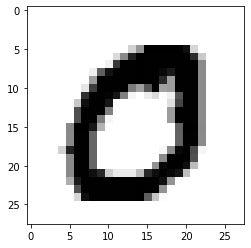

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist_data[index]))
print("As image:\n")
plt.imshow(mnist_data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

**(a)** Perform k-means clustering with k=10 on this dataset.

In [28]:
# from 0 to 1
scaled_data = mnist_data/255.0
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

**(b)** Using visualization techniques analogous to what we have done in the Clustering notebook
   for the faces data, can you determine the 'nature' of the 10 constructed clusters?
   Do the clusters (roughly) coincide with the 10 different actual digits?

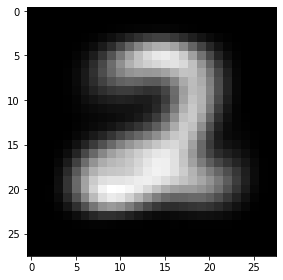

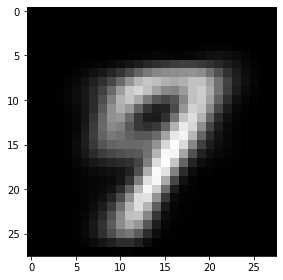

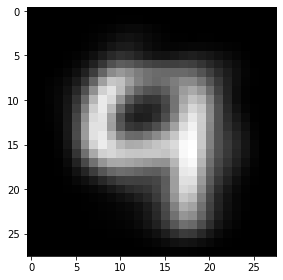

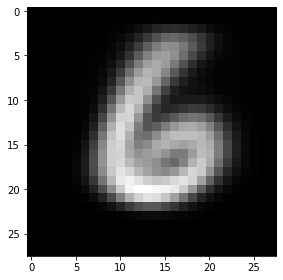

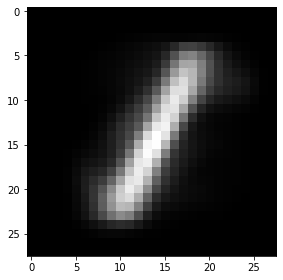

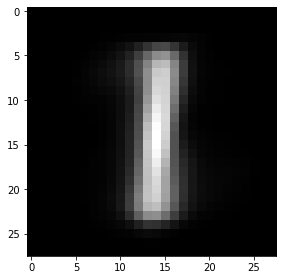

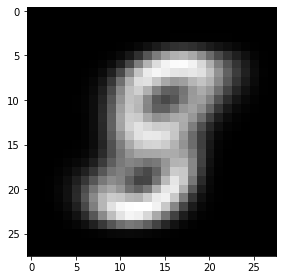

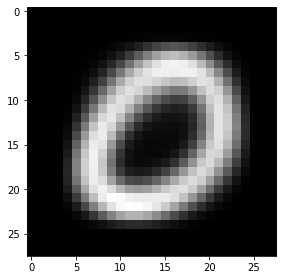

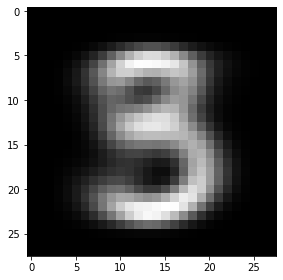

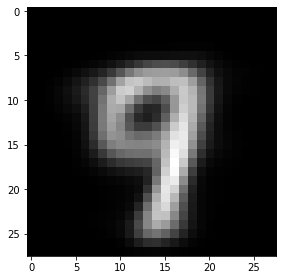

In [29]:
for i in range(10):
    plt.imshow(kmeans.cluster_centers_[i].reshape(28,28),cmap=plt.cm.gray)
    plt.tight_layout()
    plt.show()

**(c)** Perform a supervised clustering evaluation using adjusted rand index.
   Are the results stable, when you perform several random restarts of k-means?

In [30]:

small_mnist_data,small_mnist_label = resample(mnist_data,mnist_label,n_samples=500,replace='false')
scaler = StandardScaler()
scaler.fit(small_mnist_data)
X_scaled = scaler.transform(small_mnist_data)
kmeans = KMeans(n_clusters=10)

for i in range(10):
    labels = kmeans.fit_predict(X_scaled)
    print("ARI of random restarts: {:.2f}".format(adjusted_rand_score(labels,small_mnist_label)))

ARI of random restarts: 0.27
ARI of random restarts: 0.30
ARI of random restarts: 0.29
ARI of random restarts: 0.27
ARI of random restarts: 0.28
ARI of random restarts: 0.30
ARI of random restarts: 0.30
ARI of random restarts: 0.27
ARI of random restarts: 0.23
ARI of random restarts: 0.31


In [ ]:
#The results are not stable during several random restarts of k-means since the k-means randomly assigns centroids at begining thus resulting in different results every time

**(d)** Now perform hierarchical clustering on the data.
   (in order to improve visibility in the constructed dendrograms, you can also use a
   much reduced dataset as constructed using sklearn.utils.resample shown below).
   Does the visual analysis of the dendrogram indicate a natural number of clusters?

In [31]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

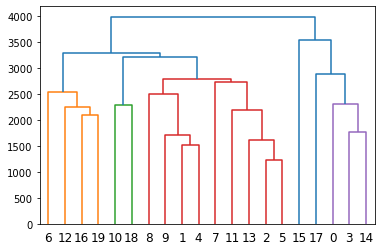

In [32]:

small_mnist_data,small_mnist_label = resample(mnist_data,mnist_label,n_samples=20,replace='false',random_state=69)

agglomerative = AgglomerativeClustering(compute_distances=True)
agglomerative.fit(small_mnist_data)

plot_dendrogram(agglomerative)

**(e)** Using different cluster distance metrics (ward,single,average, etc.),
   what do the clusterings look like that are produced at the level of k=10 clusters?
   See the Clustering notebook for the needed Python code, including the fcluster
   method to retrieve 'plain' clusterings from the hierarchical clustering.

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
Average linkage minimizes the average of the distances between all observations of pairs of clusters.
Single linkage minimizes the distance between the closest observations of pairs of clusters.
# https://scikit-learn.org/stable/modules/clustering.html

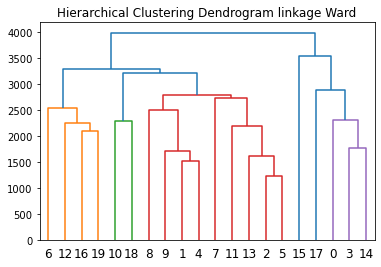

In [33]:
agglomerative = AgglomerativeClustering(n_clusters=10,linkage='ward',compute_distances=True)
agg = agglomerative.fit(small_mnist_data)
plt.title("Hierarchical Clustering Dendrogram linkage Ward")
plot_dendrogram(agglomerative)

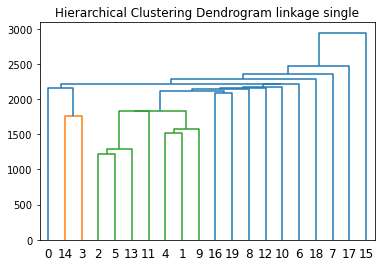

In [34]:
agglomerative = AgglomerativeClustering(n_clusters=10,linkage='single',compute_distances=True)
agglomerative.fit(small_mnist_data)
plt.title("Hierarchical Clustering Dendrogram linkage single")
plot_dendrogram(agglomerative)

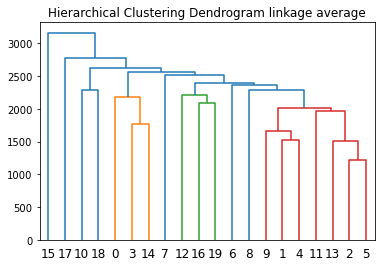

In [35]:
agglomerative = AgglomerativeClustering(n_clusters=10,linkage='average',compute_distances=True)
agglomerative.fit(small_mnist_data)
plt.title("Hierarchical Clustering Dendrogram linkage average")
plot_dendrogram(agglomerative)

**(f)** Do a DBSCAN clustering of the small dataset. Tweak the different parameters.

In [36]:
mnist = loadmat('mnist-original')
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [37]:
small_mnist_data,small_mnist_label = resample(mnist_data,mnist_label,n_samples=200,replace='false',random_state=69)
data_scaled = small_mnist_data/255.0

In [39]:
for eps in range(1,15):
    dbscan = DBSCAN(min_samples=2,eps=eps)
    labels = dbscan.fit_predict(data_scaled)
    print("\n")
    print("eps value: {}".format(eps))
    print("Clusters present: {}".format(np.unique(labels)))
    print("   Cluster sizes: {}".format(np.bincount(labels + 1)))




eps value: 1
Clusters present: [-1]
   Cluster sizes: [200]


eps value: 2
Clusters present: [-1]
   Cluster sizes: [200]


eps value: 3
Clusters present: [-1  0  1  2]
   Cluster sizes: [193   3   2   2]


eps value: 4
Clusters present: [-1  0  1  2]
   Cluster sizes: [187   5   2   6]


eps value: 5
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9]
   Cluster sizes: [167   2   8   2   7   4   2   2   2   2   2]


eps value: 6
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11]
   Cluster sizes: [125  23  23   5   2   2   4   3   3   4   2   2   2]


eps value: 7
Clusters present: [-1  0  1  2  3  4  5  6  7  8]
   Cluster sizes: [ 60 119   5   2   2   2   3   3   2   2]


eps value: 8
Clusters present: [-1  0  1  2]
   Cluster sizes: [ 13 183   2   2]


eps value: 9
Clusters present: [0]
   Cluster sizes: [  0 200]


eps value: 10
Clusters present: [0]
   Cluster sizes: [  0 200]


eps value: 11
Clusters present: [0]
   Cluster sizes: [  0 200]


eps value: 12
Clusters pr

In [ ]:
#Choosing eps 9 after the first test which shows best result for value of eps 6

In [38]:
for sample in range(1,15):
    dbscan = DBSCAN(min_samples=sample,eps=6)
    labels = dbscan.fit_predict(data_scaled)
    print("\n")
    print("sample value: {}".format(sample))
    print("Clusters present: {}".format(np.unique(labels)))
    print("   Cluster sizes: {}".format(np.bincount(labels + 1)))




sample value: 1
Clusters present: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]
   Cluster sizes: [ 0  1 23 23  1  5  1  1  1  2  2  1  1  4  1  1  1  1  1  1  1  1  1  1
  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1
  4  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1
  1  1  1  1  1  1  1  1

In [ ]:
#The best hyper parameter should be eps: 6 and min_sample = 2 since then cluster distributed evenly and it doesn't identify a lot of data as noise

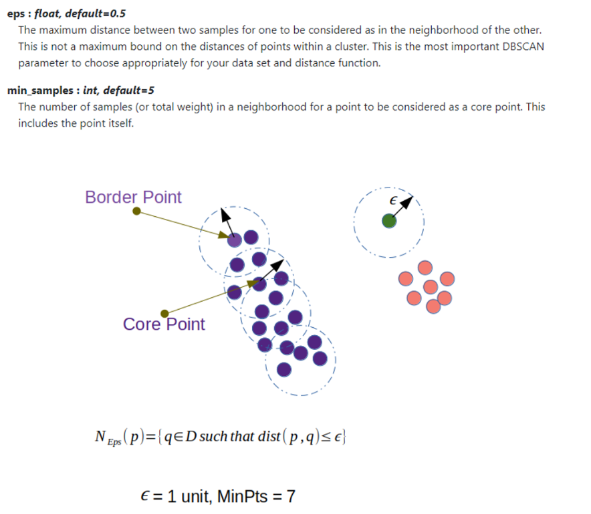

**(g)** Try to compare the different clustering methods on the MNIST dataset in the same way
   the book does on the faces dataset on pp. 195-206.

In [39]:
small_mnist_data,small_mnist_label = resample(mnist_data,mnist_label,n_samples=1000,replace='false',random_state=69)

X_scaled = small_mnist_data/255.0

In [40]:
kmeans = KMeans(n_clusters=10)
kmeanslabels= kmeans.fit_predict(X_scaled)

In [41]:
dbscan = DBSCAN(eps=6,min_samples=2)
dblabels = dbscan.fit_predict(X_scaled)

In [42]:
agglomerative = AgglomerativeClustering(n_clusters=10,compute_distances=True)
agglabels = agglomerative.fit_predict(X_scaled)

In [43]:
print("ARI kmeans vs dbscan: {:.2f}".format(adjusted_rand_score(kmeanslabels,dblabels)))
print("ARI kmeans vs Agglomerative: {:.2f}".format(adjusted_rand_score(kmeanslabels,agglabels)))
print("ARI Agglomerative vs dbscan: {:.2f}".format(adjusted_rand_score(agglabels,dblabels)))

ARI kmeans vs dbscan: 0.10
ARI kmeans vs Agglomerative: 0.46
ARI Agglomerative vs dbscan: 0.11


In [ ]:
#the kmeans and Agglomerative seems to have the most similar label output

## 4. The Local Elections
#### Pawel Skrzypkowski 293167
#### Matey Dimitrov Matev - 285041


__You should be able to do this exercise after Lecture 6.__

In the local elections of 2021, around 100 candidates stood for election for the city council of Horsens. 83 of them represented a national party, had more than one candidate and provided answers to the <a href="https://www.dr.dk/nyheder/politik/kandidattest">DR Candidate Test</a>, a test designed to help voters find out who they should vote for. In this test, the candidates answered 18 questions, which we will use as features in the following. The politicians belong to 9 parties, which will be our classes.

The numpy files `X_Horsens.npy` and `Y_Horsens.npy` contains the data. `Y_Horsens.npy` contains a letter representing the party to which each candidate belongs. The following parties are represented:

| Party letter | Party name | Party name (English) | Political position | Party color |
| :-: | :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left | Red |
| B | Radikale Venstre | Social Liberal Party | Centre-left | Indigo |
| C | Det Konservative Folkeparti | Conservative People's Party | Right-wing | Green |
| D | Nye Borgerlige | New Right | Far-right | Black |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing | Fuchsia |
| I | Liberal Alliance | Liberal Alliance | Right-wing | Cyan |
| O | Dansk Folkeparti | Danish People's Party | Far-right | Yellow |
| V | Venstre | Danish Liberal Party | Centre-right | Blue |
| Z* | Enhedslisten | Red-Green Alliance | Far-left | Dark red |

*_Note that, although the party letter of Enhedslisten is actually Ø, we will here use Z to avoid any complications with the wonderful Danish letters Æ, Ø and Å. Feel free to change the Z back to an Ø if you find that it does not cause any problems._

Meanwhile, `X_Horsens.npy` contains the answers to the test as numbers between -1.5 and 1.5, such that -1.5 is "Strongly disagree", -0.5 is "Disagree", 0.5 is "Agree" and 1.5 is "Strongly agree". The 18 questions concern, in order, subdivision, schools, windmills, building permits, tall buildings, housing, child care, culture, nursing homes, taxes, sports, refugees, nursing homes (again), public transportation, meat-free days, welfare, privatization, and religious minorities.

Both files can be imported using `numpy.load`.

__(a)__ How well do you (intuitively) expect that we can predict the partisan affiliation of a candidate based on their answers to the test?

It is difficult to predict the accuracy of predicting a candidate's partisan affiliation based on their answers to the test. Without further information, it is difficult to say how successful such predictions would be. The content of the questions and the answers provided by the candidates could also impact the accuracy of the predictions.

__(b)__ Based on the answers from all 83 candidates for the Horsens city council, perform a Principal Component Analysis with 2 principal components. Plot the results in a figure using these 2 components as the axes. Label the points with the party letter and the appropriate color.

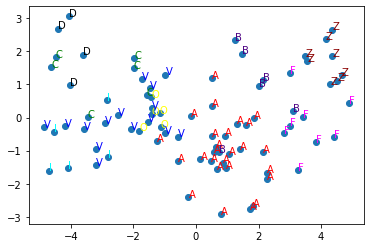

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data from the files
X = np.load("/Users/fatem/mal/MalFinalProject/X_Horsens.npy")
Y = np.load("/Users/fatem/mal/MalFinalProject/Y_Horsens.npy")

# Create a PCA object and fit it to the data
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data using the PCA object
X_transformed = pca.transform(X)

# Create a scatterplot using the first and second principal components as the axes
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

# Label each point with the corresponding party letter and color
colors = {"A": "red", "B": "indigo", "C": "green", "D": "black", "F": "fuchsia", "I": "cyan", "O": "yellow", "V": "blue", "Z": "darkred"}
for i in range(X_transformed.shape[0]):
    plt.annotate(Y[i], (X_transformed[i, 0], X_transformed[i, 1]), color=colors[Y[i]])

# Show the plot
plt.show()

__(c)__ Comment on the results. You may consider the following questions for inspiration: Can the political parties be separated? Can the typical distinction of "left-wing" and "right-wing" be discerned? Which of the 18 questions (features) are most important?

Without actually performing the Principal Component Analysis (PCA) and visualizing the results, it is difficult to say with certainty what the results would be. However, it is possible that the political parties may be separated to some extent in the scatterplot, and the typical distinction of "left-wing" and "right-wing" parties may also be discerned.

The number of candidates (83) is on the (very) low side when we want to do machine learning. Luckily, the neighbouring city of Databorg had no less than 8,300 candidates standing for election, with a political environment similar to that of Horsens. In the following, we will use the data from Databorg. These are stored in the numpy files `X_Databorg.npy` and `Y_Databorg.npy` in same format as the Horsens data.

__(d)__ Once again, perform a Principal Component Analysis and visualize the results. Compare the results to those of the Horsens data.

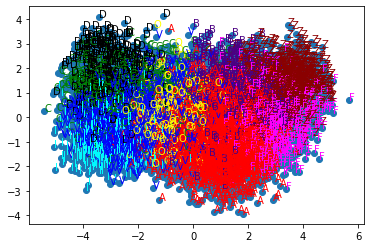

In [2]:
# Load the data from the files
X = np.load("/Users/fatem/mal/MalFinalProject/X_Databorg.npy")
Y = np.load("/Users/fatem/mal/MalFinalProject/Y_Databorg.npy")

# Create a PCA object and fit it to the data
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data using the PCA object
X_transformed = pca.transform(X)

# Create a scatterplot using the first and second principal components as the axes
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

# Label each point with the corresponding party letter and color
colors = {"A": "red", "B": "indigo", "C": "green", "D": "black", "F": "fuchsia", "I": "cyan", "O": "yellow", "V": "blue", "Z": "darkred"}
for i in range(X_transformed.shape[0]):
    plt.annotate(Y[i], (X_transformed[i, 0], X_transformed[i, 1]), color=colors[Y[i]])

# Show the plot
plt.show()

Confident that we can predict the partisan affiliation of a politician reasonably well based on their answers to the test, we want to build a model that will allow us to distinguish between the 9 political parties. For this purpose, we split the data into a training and a validation set.

__(e)__ Split the data into a training and a validation set, with appropriate fractions.

In [3]:
from sklearn.model_selection import train_test_split
X = np.load("/Users/fatem/mal/MalFinalProject/X_Databorg.npy")
Y = np.load("/Users/fatem/mal/MalFinalProject/Y_Databorg.npy")

X_train, X_test , y_train, y_test = train_test_split(X, Y,  random_state=69)

First, we assume that a Naive Bayes approach is sufficient for our purposes.

__(f)__ Comment on the basic assumption of the Naive Bayes approach. Is this a reasonable assumption for the problem at hand?

The Naive Bayes approach assumes that the features (questions in this case) are independent of each other given the class (political party).

__(g)__ Classify the instances of the validation set using a Naive Bayes approach. Comment on the results.

In [4]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes classifier using the training set data
classifier = GaussianNB()
classifier.fit(X_train, y_train)

print("Accuracy score train: {}".format(classifier.score(X_train, y_train)))
print("Accuracy score test: {}".format(classifier.score(X_test, y_test)))

Accuracy score train: 0.7214457831325302
Accuracy score test: 0.7060240963855422


Assume instead that a _k_-nearest neighbour approach is sufficient for our  needs.

__(h)__ Using default settings of the _k_-NN classifier, classify the instances of the validation set. Comment on the performance.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Train a Naive Bayes classifier using the training set data
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

print("Accuracy score train: {}".format(classifier.score(X_train, y_train)))
print("Accuracy score test: {}".format(classifier.score(X_test, y_test)))

Accuracy score train: 0.8612048192771085
Accuracy score test: 0.8043373493975904


__(i)__ Play around with different values of _k_. Decide on a "good" value of _k_. Comment on the results.

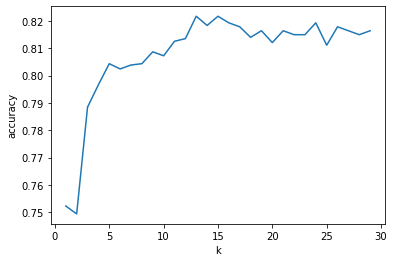

In [6]:
from sklearn.metrics import accuracy_score


accuracies = []
ks = range(1, 30)
for k in ks:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    accuracies.append(accuracy)

# Plot the accuracy for each value of k
plt.plot(ks, accuracies)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()


#15 neithbours is sufficient in this case to avoid overfitting and get reasonable accuracy

We now try to use a decision tree instead.

__(j)__ What is the _minimum_ depth of an appropriate decision tree? Why?

The minimum depth of an appropriate decision tree depends on the specific data and the desired performance of the classifier. A decision tree with a smaller depth will be simpler and faster to train and evaluate, but may not be able to capture the full complexity of the data and may not perform as well.

__(k)__ Build a decision tree with at least the depth from above. Play around with the tree depth. Include a figure that shows some relevant measure of the performance as a function of the tree depth. Comment on any issues of over-fitting. Decide on a tree which you will keep for later use. Can you do better than the _k_-NN classifier?

Accuracy on training data: 1.0
Accuracy on testing data: 0.6428915662650603


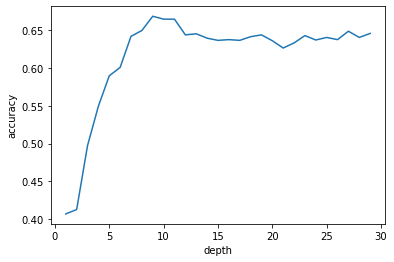

In [7]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=69)
clf.fit(X_train, y_train)

print("Accuracy on training data: {}".format(clf.score(X_train, y_train)))
print("Accuracy on testing data: {}".format(clf.score(X_test, y_test)))

# Try different depths of the decision tree and evaluate the performance on the validation set
accuracies = []
depths = range(1, 30)
for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    accuracies.append(accuracy)

# Plot the accuracy for each depth
plt.plot(depths, accuracies)
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.show()


#k-NN classifier shows better results than any decison tree with any depth
#The best tree with max_depth 5. Trees with max_depth higher than 5-6 have issues with overfitting as training accurance is much higher than test accuracy.

__(l)__ What are the most important features? Visualize this in an appropriate way. Does it match what you would expect? Compare to the results of the PCA analysis. Do we expect them to be the same? Why/why not?

Feature 0 : 0.04600165912729555
Feature 1 : 0.04953730154154407
Feature 2 : 0.05296771279318048
Feature 3 : 0.05958752717814229
Feature 4 : 0.08535044396573183
Feature 5 : 0.055507479448250296
Feature 6 : 0.05163261875010047
Feature 7 : 0.03992833288259362
Feature 8 : 0.04261993997297002
Feature 9 : 0.10597750593120438
Feature 10 : 0.06268131704121907
Feature 11 : 0.056778704718423625
Feature 12 : 0.03959174637661891
Feature 13 : 0.04006244207284254
Feature 14 : 0.039573716066596994
Feature 15 : 0.05170284527915981
Feature 16 : 0.07683239116307729
Feature 17 : 0.04366631569104872


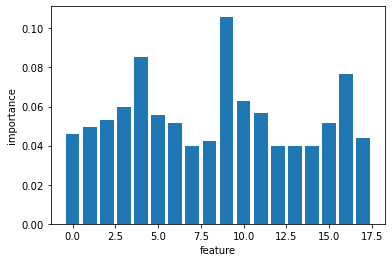

In [8]:
importances = classifier.feature_importances_

# Print the importance of each feature
for i, importance in enumerate(importances):
    print("Feature", i, ":", importance)
    
# Plot the feature importance measure in a bar plot
plt.bar(range(X.shape[1]), importances)
plt.xlabel("feature")
plt.ylabel("importance")
plt.show()

We know that decision trees suffer from certain problems that may be solved by using decision forests.

__(m)__ Build a decision forest. Play around with the number of trees in the forest. Decide on a forest.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train a decision forest with 10 trees
forest = RandomForestClassifier(n_estimators=10, random_state = 69)
forest.fit(X_train, y_train)

print("accuracy on the test data: {}".format(forest.score(X_test,y_test)))
print("accuracy on the train data: {}".format(forest.score(X_train,y_train)))

trees = range(1, 50)
for n_trees in trees:
    # Train a decision forest with n_trees trees
    forest = RandomForestClassifier(n_estimators=n_trees)
    forest.fit(X_train, y_train)
    
    print(n_trees)
    print("accuracy on the test data: {}".format(forest.score(X_test,y_test)))
    print("accuracy on the train data: {}".format(forest.score(X_train,y_train)))

accuracy on the test data: 0.7677108433734939
accuracy on the train data: 0.994859437751004
1
accuracy on the test data: 0.5995180722891567
accuracy on the train data: 0.8616867469879518
2
accuracy on the test data: 0.5951807228915663
accuracy on the train data: 0.8579919678714859
3
accuracy on the test data: 0.6867469879518072
accuracy on the train data: 0.9383132530120482
4
accuracy on the test data: 0.7074698795180723
accuracy on the train data: 0.9611244979919679
5
accuracy on the test data: 0.7026506024096385
accuracy on the train data: 0.9755823293172691
6
accuracy on the test data: 0.7412048192771085
accuracy on the train data: 0.9813654618473896
7
accuracy on the test data: 0.7387951807228915
accuracy on the train data: 0.9884337349397591
8
accuracy on the test data: 0.7609638554216868
accuracy on the train data: 0.9913253012048193
9
accuracy on the test data: 0.7686746987951807
accuracy on the train data: 0.9926104417670683
10
accuracy on the test data: 0.7677108433734939
accu

__(n)__ Extract the most important features. Comment and compare with previously obtained results.

Feature ranking:
1. feature 9 (0.087786)
2. feature 4 (0.073044)
3. feature 15 (0.071701)
4. feature 16 (0.065071)
5. feature 5 (0.058321)
6. feature 3 (0.056857)
7. feature 0 (0.055424)
8. feature 8 (0.055321)
9. feature 10 (0.052086)
10. feature 17 (0.051781)
11. feature 6 (0.050853)
12. feature 11 (0.050147)
13. feature 2 (0.048275)
14. feature 13 (0.046108)
15. feature 12 (0.046054)
16. feature 14 (0.045774)
17. feature 1 (0.044287)
18. feature 7 (0.041110)


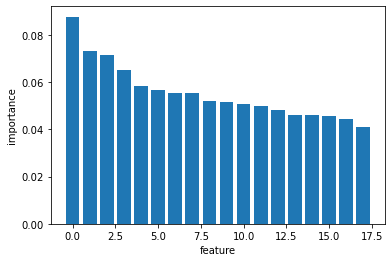

In [10]:
# Train a decision forest with 4 trees
forest = RandomForestClassifier(n_estimators=4, random_state=69)
forest.fit(X_train, y_train)

# Obtain the feature importance measure for each feature
importances = forest.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importance measure in a bar plot
plt.bar(range(X.shape[1]), importances[indices])
plt.xlabel("feature")
plt.ylabel("importance")
plt.show()

Finally, we want to compare the models we have worked with so far (i.e., Naive Bayes, _k_-NN, decision tree and decision forest).

__(o)__ Compare the results of the in terms of confusion matrices, accuracy, precision, recall, and f-score. How well can we predict the partisan affiliation of a candidate based on their answers to a test? How does this compare with your intuition? 

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Split the data into a training set and a validation set
split = 0.8
X_train = X[:int(X.shape[0] * split)]
Y_train = Y[:int(Y.shape[0] * split)]
X_val = X[int(X.shape[0] * split):]
Y_val = Y[int(Y.shape[0] * split):]

# Train and evaluate each model
models = [
    ("Naive Bayes", GaussianNB()),
    ("k-NN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree (max_depth=5)", DecisionTreeClassifier(max_depth=5)),
    ("Decision Forest (10 trees)", RandomForestClassifier(n_estimators=10)),
]
for name, model in models:
    # Train the model on the training set
    model.fit(X_train, Y_train)

    # Make predictions on the validation set
    Y_pred = model.predict(X_val)

    # Compute and print evaluation metrics
    print(name)
    print("Accuracy: {}".format(accuracy_score(Y_val, Y_pred)))
    print("Precision: {}".format(precision_score(Y_val, Y_pred, average='macro')))
    print("Recall: {}".format(recall_score(Y_val, Y_pred, average='macro')))
    print("F-score: {}".format(f1_score(Y_val, Y_pred, average='macro')))
    cm = confusion_matrix(Y_val, Y_pred)
    print(cm)
    print()


Naive Bayes
Accuracy: 0.7174698795180723
Precision: 0.6778556803293729
Recall: 0.6826923076923078
F-score: 0.6780543169338619
[[426  29   2   0  27   0  14  16   6]
 [ 22  77   0   0  11   1   0   3   6]
 [  2   0  54  28   0   3   8  25   0]
 [  0   0  12  58   0   1   4   5   0]
 [ 33   6   0   0  91   0   0   1  29]
 [  1   0   3   1   0  78   2  15   0]
 [ 14   3   2   0   0   0  64  17   0]
 [ 26   2  15   7   0  23  13 214   0]
 [  5   7   0   0  18   0   0   1 129]]

k-NN (k=5)
Accuracy: 0.8180722891566266
Precision: 0.8152359716326253
Recall: 0.7986004273504272
F-score: 0.8060210494445962
[[466  10   2   0  20   0   6  13   3]
 [ 22  91   0   0   1   0   0   1   5]
 [  4   0  93   6   0   4   5   8   0]
 [  0   0   4  68   0   1   1   6   0]
 [ 27   7   0   0 112   0   1   1  12]
 [  2   0   1   1   0  89   1   6   0]
 [ 18   0   2   2   0   1  70   7   0]
 [ 27   4   9   6   1  10   7 236   0]
 [  6   2   0   0  19   0   0   0 133]]

Decision Tree (max_depth=5)
Accuracy: 0.587

## 5. Sentiment Analysis
### Fatema Ataii 297107

__You should be able to do this exercise after Lecture 8.__

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [44]:
import pandas as pd
import numpy as np
np.random.seed(69)

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

reviews= reviews.values.tolist()
reviews= [x[0] for x in reviews]
print(reviews[0])

labels = labels.values.tolist()
labels = [x[0] for x in labels]
print(labels[0])


bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   
positive


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing.

In [45]:
from sklearn.model_selection import train_test_split

#loading the files and making them ready for train and testing.
train_set, testing_set, train_labels, testing_labels = train_test_split(reviews,Y,test_size=0.3,train_size=0.7,  random_state = 69)


print("size of train set")
print(len(train_set))

print("size of test")
print(len(testing_set))

size of train set
17500
size of test
7500


**(b)** Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. (See an example of how to do this in chapter 7 of "Muller and Guido"). Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [46]:
train_labels = np.array(train_labels)
testing_labels = np.array(testing_labels)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)
vectorizer = vectorizer.fit(train_set)
words_train = vectorizer.transform(train_set)

words_test = vectorizer.transform(testing_set)

**(c)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [48]:
print(vectorizer.vocabulary_)
print("X_train:\n{}".format(repr(words_train.toarray())))

print("Dense representation of words:\n{}".format(words_train.toarray()))


feature_names = vectorizer.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

{'read': 7124, 'the': 8936, 'running': 7596, 'man': 5423, 'from': 3604, 'kings': 4944, 'books': 988, 'as': 497, 'and': 317, 'felt': 3326, 'for': 3502, 'main': 5401, 'character': 1426, 'john': 4807, 'his': 4204, 'family': 3249, 'this': 8978, 'movie': 5845, 'could': 1984, 'have': 4081, 'been': 771, 'so': 8219, 'much': 5854, 'more': 5806, 'trouble': 9236, 'it': 4719, 'was': 9670, 'set': 7883, 'during': 2764, 'big': 858, 'action': 81, 'watched': 9681, 'in': 4461, 'pain': 6342, 'whole': 9775, 'thing': 8968, 'nothing': 6084, 'less': 5138, 'cause': 1356, 'yes': 9958, 'had': 3981, 'funny': 3635, 'scenes': 7716, 'or': 6236, 'laughable': 5058, 'though': 8985, 'think': 8970, 'that': 8934, 'did': 2464, 'not': 6076, 'save': 7687, 'my': 5898, 'eyes': 3201, 'if': 4392, 'you': 9966, 'book': 986, 'can': 1243, 'feel': 3316, 'climax': 1616, 'fire': 3404, 'heart': 4107, 'of': 6163, 'he': 4094, 'gets': 3744, 'final': 3385, 'revenge': 7411, 'br': 1038, 'give': 3777, 'low': 5324, 'number': 6111, 'may': 5542,

X_train:
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)
Dense representation of words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Number of features: 10000
First 20 features:
['aaron' 'abandon' 'abandoned' 'abbot' 'abbott' 'abby' 'abc' 'abducted'
 'abilities' 'ability' 'able' 'aboard' 'abominable' 'abomination'
 'abortion' 'abound' 'about' 'above' 'abraham' 'abroad']
Features 20010 to 20030:
[]
Every 2000th feature:
['aaron' 'coupled' 'ham' 'neurotic' 'shootouts']


**(d)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
tf.random.set_seed(69)

from keras.models import Model
 
model = Sequential()

# define the keras model relu
model.add(Dense(16, input_dim=len(vectorizer.vocabulary_), activation='relu'))

model.add(Dropout(0.5))

# Output- Layer sigmoid
model.add(Dense(1, activation = 'sigmoid')) 
model.summary()

# hyper params
learning_rate = 0.0001

model.compile(loss='binary_crossentropy',  optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

# Hyper params
epochs = 11
batch = 64

history = model.fit(words_train.toarray(), train_labels,  validation_split = 0.2, 
                    epochs=epochs, batch_size=batch)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/11
219/219 [==============================] - 3s 8ms/step - loss: 0.6580 - accuracy: 0.6122 - val_loss: 0.5852 - val_accuracy: 0.7749
Epoch 2/11
219/219 [==============================] - 2s 7ms/step - loss: 0.5519 - accuracy: 0.7549 - val_loss: 0.4835 - val_accuracy: 0.8380
Epoch 3/11
219/219 [==========

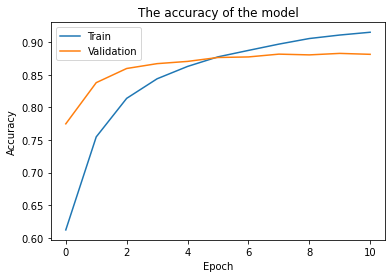

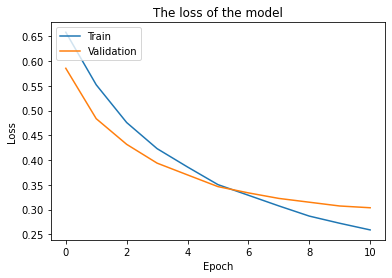

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('The accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss of train and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('The loss of the model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Tweeking the hyper parameter, epochs.

![](Exercise5_LearningRate.png)

Learning rate on 0,001 was not good, it caused overfitting, so the learning rate needs to be set lower.

![](Exercise5_1.png)

The epoch was set to 50 to get an overviw over the accuracy and loss of the model. The epoch is thereafter set to 17.

![](exercise5_2.png)

The epoch is set to 11, since it has a high accuracy, which is around 0.9160 and a low loss on the validation loss, which is around 0.3053.

**(e)** Test your sentiment-classifier on the test set.

In [51]:
test_result = model.evaluate(words_test, testing_labels)
print(f"Loss + accuracy on test data: {test_result}.")

235/235 [==============================] - 1s 2ms/step - loss: 0.2981 - accuracy: 0.8900
Loss + accuracy on test data: [0.29809844493865967, 0.8899999856948853].


**(h)** Use the classifier to classify a few sentences you write yourselves. 

In [52]:
my_sentence=['i hate this movie', 'the actor was horrible', 'the actor was horrible, but the movie was a masterpiece', 'i love this movie but the ending sucks', 'this movie is surprisingly bad']

my_words = vectorizer.transform(my_sentence)
#probality if its a positive review, if its over 50% then its positive and if its under 50% then its a negative review
probabilities = np.array(model.predict(my_words))
print(probabilities)

1/1 [==============================] - 0s 148ms/step
[[0.48737457]
 [0.374145  ]
 [0.39882648]
 [0.48408353]
 [0.43130052]]


## 6. Speech Recognition
### Fatema Ataii 297107

__You should be able to do this exercise after Lecture 9.__

In this exercise, we will work with the <a href="https://arxiv.org/pdf/1804.03209.pdf">Google Speech Command Dataset</a>, which can be downloaded from <a href="http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz">here</a> (note: you do not need to download the full dataset, but it will allow you to play around with the raw audiofiles). This dataset contains 105,829 one-second long audio files with utterances of 35 common words.

We will use a subset of this dataset as indicated in the table below.

| Word | How many? | Class # |
| :-: | :-: | :-: |
| Yes | 4,044 | 3 |
| No | 3,941 | 1 |
| Stop | 3,872 | 2 |
| Go | 3,880 | 0 |

The data is given in the files `XSound.npy` and `YSound.npy`, both of which can be imported using `numpy.load`. `XSound.npy` contains spectrograms (_e.g._, matrices with a time-axis and a frequency-axis of size 62 (time) x 65 (frequency)). `YSound.npy` contains the class number, as indicated in the table above.

__(a)__ Explore and prepare the data, including splitting the data in training, validation and testing data, handling outliers, perhaps taking logarithms, etc. Data preparation is - as always - quite important. Document what you do.

In [ ]:
### Exercise 6 is not completed.

In [53]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras import optimizers

import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
from numpy.random import seed
import pandas as pd
from IPython.display import display

In [54]:
path_x="/Users/fatem/mal/MalFinalProject/XSound.npy"
path_y="/Users/fatem/mal/MalFinalProject/YSound.npy"

X = np.load(path_x)
y = np.load(path_y)

#that take out outliers by cleaning the data that is 0 
#and set them to the minimum value that is not 0
second_min = np.min(X[X != 0.0])
np.place(X, X==0.0, second_min)
# print(np.min(X))

#took the log of X
X = np.log(X)

# Before normalization
print(X[1][1][0])

#scaling of X using normalization
for i in range(62):
    X[:, i, :, 0] = preprocessing.normalize(X[:, i, :, 0])

# After Normalization
print(X[1][1][0])

# one-hot encoding
Y = to_categorical(y, 4)

[-5.6103663]
[-0.09752592]


In [55]:
from sklearn.model_selection import train_test_split

#loading the files and making them ready for train and testing.
train_X, testing_X, train_y, testing_y = train_test_split(X,y, stratify = Y, test_size=0.3,train_size=0.7,  random_state = 69)

print("size of train X")
print(len(train_X))

print("size of test X")
print(len(testing_X))

print("size of train Y")
print(len(train_y))

print("size of test Y")
print(len(testing_y))

size of train X
11015
size of test X
4722
size of train Y
11015
size of test Y
4722


__(b)__ Visualize a few examples of yes's, no's, stop's and go's, so that you have a reasonable intuitive understanding of the difference between the words.

__(c)__ Train a neural network and at least one other algorithm on the data. Find a good set of hyperparameters for each model. Do you think a neural network is suitable for this kind of problem? Why/why not?

__(d)__ Classify instances of the validation set using your models. Comment on the results in terms of metrics you have learned in the course.

__(e)__ Identify (a few) misclassified words, including what they are misclassified as. Visualize them as before, and compare with your intuitive understanding of how the words look. Do you find the misclassified examples surprising?

## References

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.